<module 'preprocessing' from '/home/tonko22/PycharmProjects/npo_classification/preprocessing.py'>

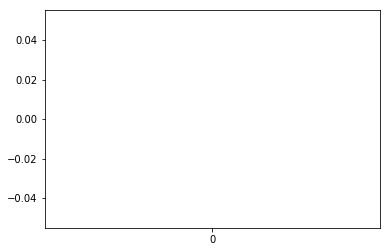

In [410]:
import pandas as pd
import parser
import imp
import preprocessing
import nltk
import imp
import numpy as np

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100
imp.reload(parser)
imp.reload(preprocessing)
#nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_ru')
# nltk.download('stopwords')

In [365]:
!git commit -a -m "minor fix"

[master 37684ad] minor fix
 1 file changed, 19 insertions(+), 57 deletions(-)


In [401]:
df = pd.read_pickle("np_ngo_classification_links.pkl")
print(len(df))
df

197


,Регион,Название организации,ИНН,Год регистрации,Адресс,Возможность пожертвовать деньги на сайте,Возможность обратиться за помощью,Ссылка на сайт,Вид деятельности 1,Вид деятельности 2,...,Вид деятельности 5,Вид деятельности 6,Вид деятельности 7,Вид деятельности 8,Вид деятельности 9,Вид деятельности 10,Вид деятельности 11,Вид деятельности 12,num_sites,web_text
0,Москва,"Межрегиональная общественная благотворительная организация ""Общество защиты прав потребителей и ...",5032173157,2007-07-12,"г Москва, Орехово-Борисово Южное р-н, МКАД 23-й км, д 6",0,0,http://greenstartup.ru/,3_2,6_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,function set_cookie(){var now = new Date();var time = now.getTime();time += 19360000 * 1000;now....
1,Москва,"Межрегиональная благотворительная общественная организация инвалидов ""Общество пациентов с перви...",7702370774,2007-08-28,"г Москва, Мещанский р-н, ул Трифоновская, д 49, оф 41",1,1,http://oppid.ru/,2_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.0 Transitional//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-tra..."
2,Москва,"Некоммерческая организация Благотворительный фонд ""Столица Милосердия""",7702472455,2014-02-11,"г Москва, Мещанский р-н, ул Щепкина, д 9 стр 1",1,1,capital-mercy.ru,1_9,1_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,html Благотворительный фонд Столица милосердия [if IE 6]>\n<link rel='stylesheet' type='text/css...
3,Москва,"Российский общественный благотворительный фонд ветеранов (пенсионеров) войны, труда и Вооруженны...",7704058560,1998-06-05,"г Москва, р-н Соколиная Гора, ул Щербаковская, д 50/52",1,1,http://www.rbfondveteranov.ru/,1_4,5_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.0 Strict//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dt..."
4,Москва,"Благотворительный фонд ""Фонд Валерия Гергиева""",7709402778,2003-01-27,"г Москва, р-н Арбат, ул Молчановка Б., д 23 к 2",0,0,http://gergiev-charity.com/rus/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD HTML 4.01 Transitional//EN"" ""http://www.w3.org/TR/html4/loose.dtd"" Благ..."
5,Москва,Международный Благотворительный Фонд Владимира Спивакова,7710012370,1994-05-20,"г Москва, Пресненский р-н, Шведский тупик, д 3, оф 17",1,0,http://spivakov.ru/fund/contacts/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Контактная информация и реквизиты | Фонд Спивакова [if lt IE 9]>\n<script src=""http://spiva..."
6,Москва,"Благотворительный фонд поддержки детей с особенностями развития ""Я есть!""",7710479817,2012-05-02,"г Москва, Пресненский р-н, пер Кондратьевский Б., д 4 к 3, оф 29",1,1,http://yaest.ru/,1_7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Главная | Я есть <script src=""http://ajax.googleapis.com/ajax/libs/jquery/1.12.1/jquery.min..."
7,Москва,"Благотворительный фонд помощи бездомным животным ""Ковчег""",7716451494,2014-11-14,"г Москва, Ярославский р-н, Ярославское шоссе, д 2 к 1, кв 157",1,0,http://fond-kovcheg.ru,6_4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Фонд «Ковчег» | Поможем вместе window._wpemojiSettings = {""baseUrl"":""http:\/\/s.w.org\/imag..."
8,Москва,Благотворительный фонд поддержки детей имени императрицы Александры Федоровны Романовой,7701064809,2011-03-22,"105082, ГОРОД МОСКВА, УЛИЦА ФРИДРИХА ЭНГЕЛЬСА, 75, СТР. 3, ОФ. № 1",1,1,http://www.vfonde.ru/,1_7,1_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.1//EN"" ""http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd"" Áëàãîòâîð..."
9,Москва,"Благотворительный Фонд ""Центр помощи беспризорным детям"" Торгово-промышленной палаты Российской ...",7701295193,2002-03-27,"101000, ГОРОД МОСКВА, БУЛЬВАР ЧИСТОПРУДНЫЙ, 5/10, С.1",1,1,http://www.tppdetfond.ru/,1_3,1_7,...,2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,html if(!window.BX)window.BX={};if(!window.BX.message)window.BX.message=function(mess){if(typeof...


In [308]:
pp = preprocessing.PreprocessingInterface()

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [367]:
pp = preprocessing.PreprocessingInterface()
df["text_normalized"] = df["web_text"].apply(pp.normalize)
df["text_padded"] = df["text_normalized"].apply(pp.pad_punctuation)
df["tokenized"] = df["text_padded"].apply(pp.razdel_tokenize)
df["no_punct"] = df["tokenized"].apply(pp.remove_punct)
df["text_no_stop"] = df["no_punct"].apply(pp.remove_stopwords)
df["preprocessed_tokens"] = df["text_no_stop"].apply(pp.remove_digits)

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [368]:
df["cyrillic_text"] = df["preprocessed_tokens"].apply(pp.filter_non_cyrillic)
df = df[df['cyrillic_text'].astype(str) != '[]']
df.dropna(subset=["cyrillic_text"], inplace=True)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [373]:
# df[df["cyrillic_text"].map(len)<15][["Ссылка на сайт", "cyrillic_text"]].to_pickle("broken_sites.pkl")
df[df["cyrillic_text"].map(len)<15][["Ссылка на сайт", "cyrillic_text"]]

In [379]:
# Drop short texts
df = df[df["cyrillic_text"].map(len)>15]

In [380]:
df["lemmatized"] = df["cyrillic_text"].apply(pp.lemmatize_tokens_with_mystem)
df["lemmatized"].replace('', np.nan, inplace=True)
df["preprocessed_text"] = df["lemmatized"].apply(" ".join)
df.dropna(subset=["preprocessed_text"], inplace=True)
df = df[df['preprocessed_text'].astype(str) != '[]']

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [381]:
df = df.reset_index().drop("index", axis=1)

In [363]:
!git commit -a -m "minor fix, new dataset"

[master d1eca22] minor fix, new dataset
 2 files changed, 646 insertions(+), 13361 deletions(-)
 rewrite Data_cleaning_text_extraction.ipynb (97%)


In [382]:
# df.dropna(subset=["preprocessed_tokens"], inplace=True)
pp.stats_for_series(df["preprocessed_text"])

,Total tokens,Unique tokens,Total texts,Empty texts,Empty tokens
Count,1081538,188,176,0,0


In [383]:
df[["preprocessed_text", 
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
  ]].to_pickle("preprocessed_dataset.pkl")

In [492]:
df = pd.read_pickle("preprocessed_dataset.pkl")

In [496]:
df[[
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]]

,Вид деятельности 1,Вид деятельности 2,Вид деятельности 3,Вид деятельности 4,Вид деятельности 5,Вид деятельности 6,Вид деятельности 7,Вид деятельности 8,Вид деятельности 9,Вид деятельности 10,Вид деятельности 11,Вид деятельности 12
0,2,None,None,None,None,None,None,None,None,None,None,None
1,1,1,1,2,None,None,None,None,None,None,None,None
2,1,5,None,None,None,None,None,None,None,None,None,None
3,4,None,None,None,None,None,None,None,None,None,None,None
4,4,None,None,None,None,None,None,None,None,None,None,None
5,1,None,None,None,None,None,None,None,None,None,None,None
6,6,None,None,None,None,None,None,None,None,None,None,None
7,1,1,1,1,2,None,None,None,None,None,None,None
8,4,4,7,None,None,None,None,None,None,None,None,None
9,4,4,4,1,1,1,1,None,None,None,None,None


In [474]:
list(set(df.ix[:, 1:].loc[1]))

[None, '1', '2']

In [504]:
for index, row in df.iterrows():
    unique_row_values = list(set(row[1:]))
    vals = [e for e in unique_row_values if e!=None]
    while len(vals)<12:
        vals.append(None)
    print(vals)
    row[1:] = vals

['2', None, None, None, None, None, None, None, None, None, None, None]
['1', '2', None, None, None, None, None, None, None, None, None, None]
['5', '1', None, None, None, None, None, None, None, None, None, None]
['4', None, None, None, None, None, None, None, None, None, None, None]
['4', None, None, None, None, None, None, None, None, None, None, None]
['1', None, None, None, None, None, None, None, None, None, None, None]
['6', None, None, None, None, None, None, None, None, None, None, None]
['1', '2', None, None, None, None, None, None, None, None, None, None]
['7', '4', None, None, None, None, None, None, None, None, None, None]
['1', '4', None, None, None, None, None, None, None, None, None, None]
['6', None, None, None, None, None, None, None, None, None, None, None]
['4', None, None, None, None, None, None, None, None, None, None, None]
['1', None, None, None, None, None, None, None, None, None, None, None]
['1', None, None, None, None, None, None, None, None, None, None, Non

In [505]:
df

,preprocessed_text,Вид деятельности 1,Вид деятельности 2,Вид деятельности 3,Вид деятельности 4,Вид деятельности 5,Вид деятельности 6,Вид деятельности 7,Вид деятельности 8,Вид деятельности 9,Вид деятельности 10,Вид деятельности 11,Вид деятельности 12
0,оппид общество пациент первичный иммунодефицит русый англ главный цель информационный канал доно...,2,None,None,None,None,None,None,None,None,None,None,None
1,благотворительный фонд столица милосердие загрузка кликнуть отменять нажимать перенести вперед у...,1,2,None,None,None,None,None,None,None,None,None,None
2,москва щербаковский ул главный персоналия российский фонд ветеран год акция российский фонд вете...,5,1,None,None,None,None,None,None,None,None,None,None
3,благотворительный фонд фонд валерий гергиев благотворительный фонд фонд валерий гергиев русый фо...,4,None,None,None,None,None,None,None,None,None,None,None
4,контактный информация реквизит фонд спиваков вконтакте фонд сделать пожертвование фонд спиваков ...,4,None,None,None,None,None,None,None,None,None,None,None
5,главный добавлять кнопка вызов меню фонд проект друг волонтер родитель живой история пожертвоват...,1,None,None,None,None,None,None,None,None,None,None,None
6,фонд ковчег помогать вместе вход регистрация помогать меню новость животный проект история помог...,6,None,None,None,None,None,None,None,None,None,None,None
7,загрузка данные закрывать развертывать свертывать окно сохранять отменять продолжать ч м скрыват...,1,2,None,None,None,None,None,None,None,None,None,None
8,фонд кузнецкий мост главный открывать закрывать показывать информация скрывать информация размер...,7,4,None,None,None,None,None,None,None,None,None,None
9,фонд михаил рудяк история фонд проект благотворительный бал контакт пожертвовть история фонд про...,1,4,None,None,None,None,None,None,None,None,None,None


In [507]:
pd.get_dummies(df[[
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]])

,Вид деятельности 1_1,Вид деятельности 1_2,Вид деятельности 1_3,Вид деятельности 1_4,Вид деятельности 1_5,Вид деятельности 1_6,Вид деятельности 1_7,Вид деятельности 1_9,Вид деятельности 2_1,Вид деятельности 2_2,...,Вид деятельности 3_2,Вид деятельности 3_4,Вид деятельности 3_7,Вид деятельности 4_2,Вид деятельности 4_9,Вид деятельности 5_1,Вид деятельности 5_6,Вид деятельности 6_4,Вид деятельности 7_2,Вид деятельности 8_5
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [494]:
def extract_lv_1(category_string):
    if  isinstance(category_string, str):
        if category_string[0]==" ":
            return category_string[1]
        return category_string[0]

In [495]:
# Extracting only lvl 1 categories
target_cols = [
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]
for each in target_cols:
    df[each] = df[each].apply(extract_lv_1)

In [438]:
y

,Вид деятельности 1_1,Вид деятельности 1_2,Вид деятельности 1_3,Вид деятельности 1_4,Вид деятельности 1_6,Вид деятельности 1_7,Вид деятельности 1_9,Вид деятельности 2_,Вид деятельности 2_1,Вид деятельности 2_2,...,Вид деятельности 6_1,Вид деятельности 6_9,Вид деятельности 7_1,Вид деятельности 7_9,Вид деятельности 8_1,Вид деятельности 8_6,Вид деятельности 9_8,Вид деятельности 10_5,Вид деятельности 11_3,Вид деятельности 12_7
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [508]:
X = df["preprocessed_text"]
y = pd.get_dummies(df[[
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [509]:
y

,Вид деятельности 1_1,Вид деятельности 1_2,Вид деятельности 1_3,Вид деятельности 1_4,Вид деятельности 1_5,Вид деятельности 1_6,Вид деятельности 1_7,Вид деятельности 1_9,Вид деятельности 2_1,Вид деятельности 2_2,...,Вид деятельности 3_2,Вид деятельности 3_4,Вид деятельности 3_7,Вид деятельности 4_2,Вид деятельности 4_9,Вид деятельности 5_1,Вид деятельности 5_6,Вид деятельности 6_4,Вид деятельности 7_2,Вид деятельности 8_5
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [510]:
y.shape

(176, 23)

In [511]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    ngram_range=(1, 2),
    max_features=1000)
word_vectorizer.fit(X)

train_word = word_vectorizer.transform(X_train)
test_word = word_vectorizer.transform(X_test)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='char',
    ngram_range=(2, 6),
    max_features=1000)
char_vectorizer.fit(X)

train_char = char_vectorizer.transform(X_train)
test_char = char_vectorizer.transform(X_test)

from scipy.sparse import hstack
train_features = hstack([train_word, train_char])
test_features = hstack([test_word, test_char])

In [512]:
train_features.shape

(117, 2000)

In [455]:
df.plot?

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


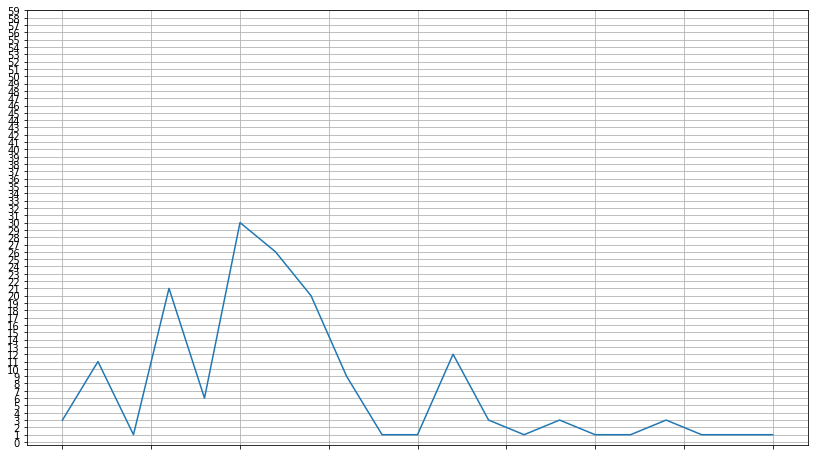

In [513]:
y.ix[:, 2:].sum().plot(figsize=(14,8), grid=True, yticks=range(60))

In [445]:
y["Вид деятельности 1_1"].sum()

96

In [524]:
!git pull

Already up-to-date.


In [514]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

clf = KNeighborsClassifier()
k_range = np.arange(1,10)
weight_options = ["uniform", "distance"]
metrics = ['minkowski','euclidean','manhattan']
param_grid = dict(n_neighbors = k_range, weights = weight_options, metric=metrics)
grid = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy") 
grid.fit(train_features, y_train) 
print(grid.best_score_) 
print(grid.best_params_)

0.6581196581196581
{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}


In [515]:
!git commit -a -m "feature shape fix"

[master e8b74e4] feature shape fix
 3 files changed, 24319 insertions(+), 174 deletions(-)
 rewrite preprocessed_dataset.pkl (70%)


In [267]:
from sklearn.multiclass import OneVsRestClassifier

In [216]:
def evaluate(clf, test_features, y_test, proba=False):
    if proba:
        y_pred = clf.predict_proba(test_features)
    else:
        y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")

In [ ]:
logreg = LogisticRegression()

In [278]:
def score_one_vs_rest(input_clf, proba=False):
    clf = OneVsRestClassifier(input_clf)
    clf.fit(train_features, y_train)
    evaluate(clf, test_features, y_test)
    if proba:
        y_pred = clf.predict_proba(test_features)
    else:
        y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")

In [285]:
# score_one_vs_rest(KNeighborsClassifier(metric='minkowski', n_neighbors=1, weights='uniform'))
score_one_vs_rest(lgb.LGBMClassifier(silent=False, n_estimators=80, class_weight="balanced"))

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 9 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 17 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 42 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 56 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 65 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarni

(0.16393442622950818, 0.17321136465873307)

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV

In [230]:
scores = cross_val_score(clf, test_features, y_test, cv=10, scoring='accuracy')
np.mean(scores)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.08333333333333333

In [269]:
clf = KNeighborsClassifier()
clf.fit(train_features, y_train)
evaluate(clf, test_features, y_test)
y_pred = clf.predict(test_features)
accuracy_score(y_test, y_pred, normalize=True)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.13114754098360656

In [237]:
!git commit -a -m "preprocessing done, 0.30 KNN"

[master 3e0ebec] preprocessing done, 0.30 KNN
 2 files changed, 8702 insertions(+), 17115 deletions(-)
 rewrite preprocessing_and_baseline_modeling.ipynb (64%)


In [ ]:
train_features

In [246]:
lgb.LGBMClassifier.fit?

In [284]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(silent=False, n_estimators=80, class_weight="balanced")
lgb_clf.fit(train_features, y_train)

ValueError: bad input shape (123, 84)

In [ ]:
lgb_clf.fit(train_features, y_train, eval_set=[(test_features, y_train)], verbose=True, categorical_feature=[0,1,2,3])

In [283]:
import pprint

def report(clf, test_features, y_test):
    y_pred = clf.predict(test_features)
    return classification_report(y_test, y_pred)

pprint.pprint(report(clf, test_features, y_test))

('             precision    recall  f1-score   support\n'
 '\n'
 '          0       0.00      0.00      0.00         1\n'
 '          1       0.00      0.00      0.00         4\n'
 '          2       0.60      0.30      0.40        10\n'
 '          3       0.00      0.00      0.00         0\n'
 '          4       0.00      0.00      0.00         0\n'
 '          5       0.00      0.00      0.00         0\n'
 '          6       1.00      0.23      0.38        13\n'
 '          7       0.00      0.00      0.00        13\n'
 '          8       0.00      0.00      0.00         6\n'
 '          9       0.00      0.00      0.00         1\n'
 '         10       0.00      0.00      0.00         0\n'
 '         11       0.00      0.00      0.00         0\n'
 '         12       0.00      0.00      0.00         3\n'
 '         13       0.00      0.00      0.00         0\n'
 '         14       0.00      0.00      0.00         1\n'
 '         15       1.00      0.83      0.91         6\n'
 '      

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
